# Data Preparation

## Loading Data

In [1]:
import pandas as pd

# pakai data online, biar gausah download
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
)
# reading data
df = pd.read_csv(url, header=None)
# tampilkan data
df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Ganti Nama Kolom

In [2]:
df.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


M: Male

F: Female

I: Infant (yang belum dewasa susah dikenali kelaminnya)

Rings: Jumlah mutiara di dalamnya

# Visualisasi Data

## Distribusi Label

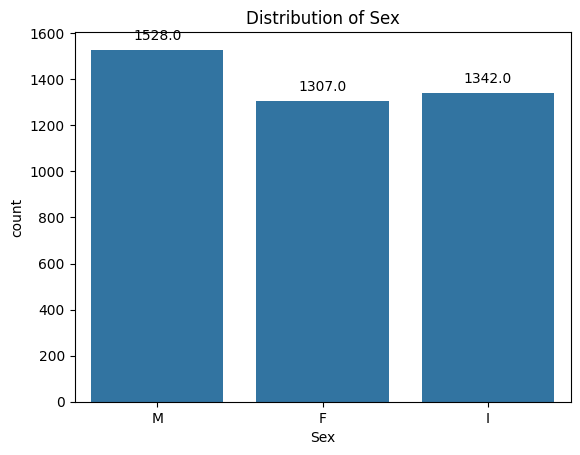

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualisasi distribusi jenis kelamin
ax = sns.countplot(x="Sex", data=df)
plt.title("Distribution of Sex")

# tambahkan label jumlah di atasnya
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="center", xytext=(0, 10), textcoords="offset points")

plt.show()

bisa dilihat kalau persebaran jumlah label kelasnya cukup rata, tidak terlalu jomplang.

## Scatter Matrix dari Features dan Labelnya

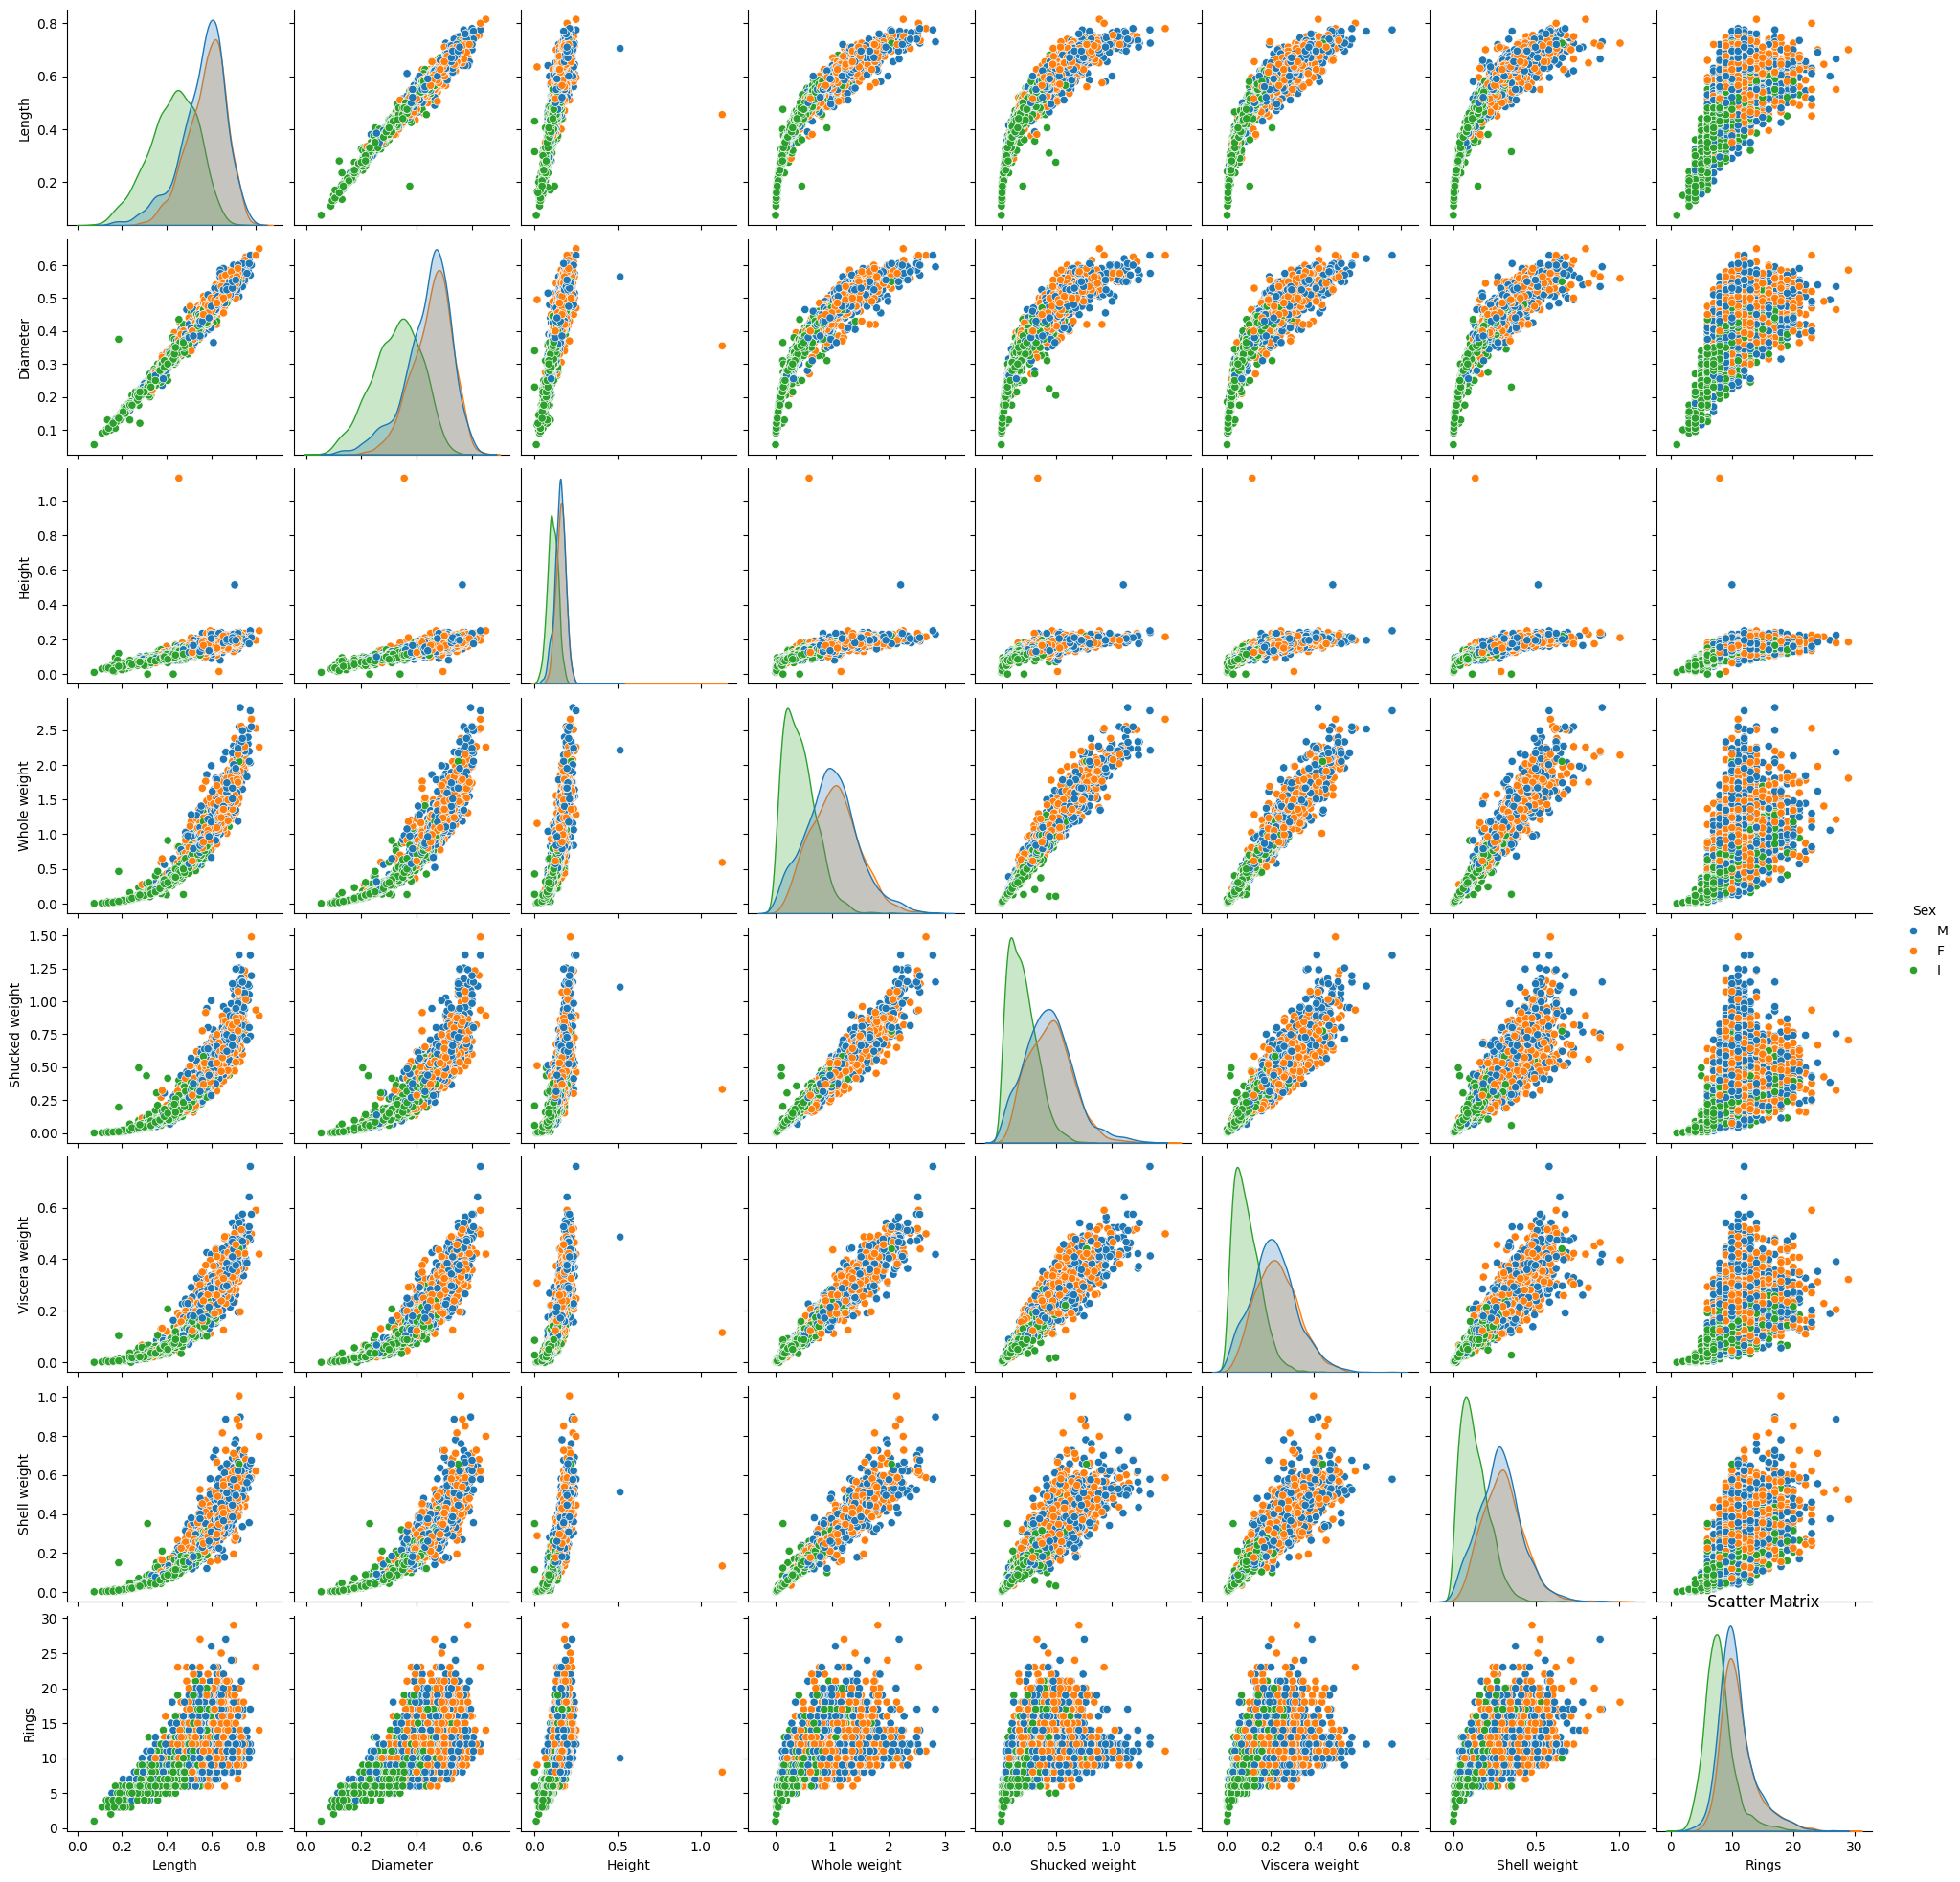

In [4]:
import numpy as np

# visualisasikan persebaran label dari masing-masing features
g = sns.pairplot(df, hue="Sex")
plt.title("Scatter Matrix")
plt.show()

bisa kita simpulkan bahwa akan sulit membedakan antara tiram betina dengan yang masih belum dewasa. Bisa dilihat bahwa persebaran warna oranye dengan biru saling berhimpitan, sedangkan warna hijau mudah dipisahkan.

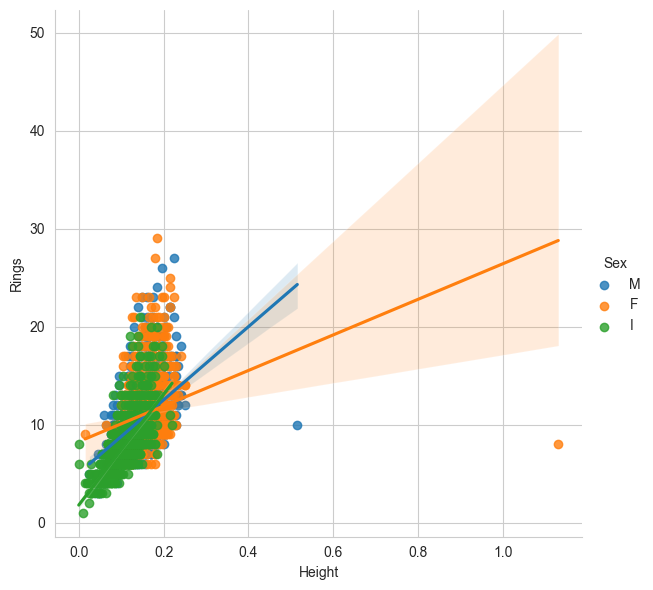

In [5]:
sns.set_style('whitegrid')
sns.lmplot(x='Height', y='Rings', data=df, hue='Sex', height=6, aspect=1, fit_reg=True)

terlihat 2 outlier di data

# Data Preprocessing

## Outliers Removal

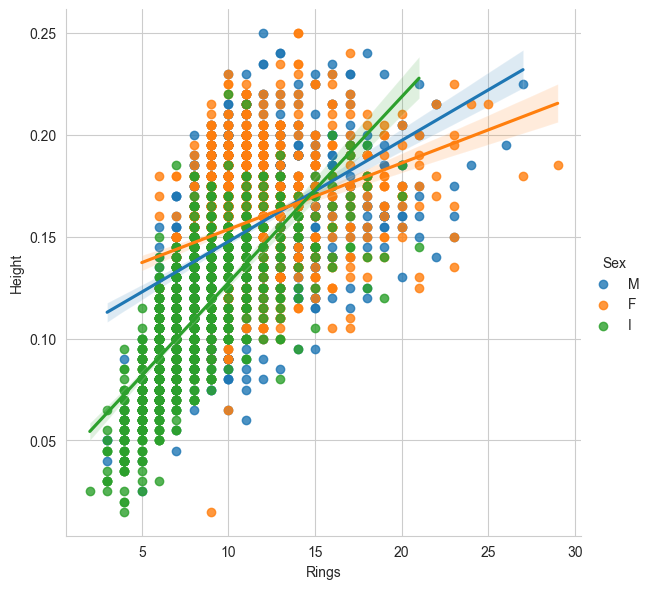

In [6]:
import numpy as np
from scipy import stats

df = df[(np.abs(stats.zscore(df['Height'])) < 3)]

sns.lmplot(x='Rings', y='Height', data=df, hue='Sex', height=6, aspect=1, fit_reg=True)

## Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

# mengganti inisial kelamin jadi angka
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

df

C:\Users\richa\AppData\Local\Temp\ipykernel_13080\759107448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = le.fit_transform(df["Sex"])


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# K-Means

              precision    recall  f1-score   support

           0       0.40      0.69      0.50      1306
           1       0.10      0.04      0.05      1339
           2       0.21      0.20      0.20      1527

    accuracy                           0.30      4172
   macro avg       0.24      0.31      0.25      4172
weighted avg       0.23      0.30      0.25      4172



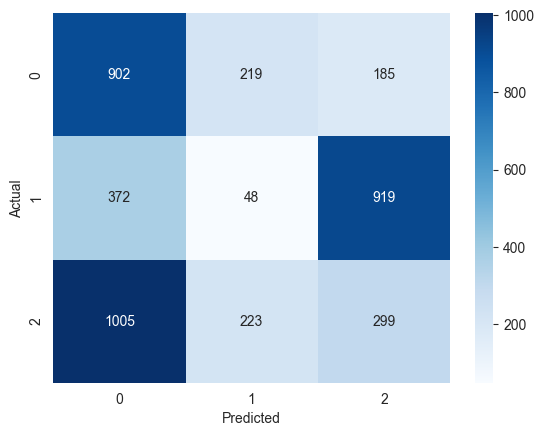

In [8]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,verbose=0,tol=1e-3,max_iter=300,n_init=20)
kmeans.fit(df.drop('Sex',axis=1))


df1=df.copy()
print(classification_report(df1['Sex'], kmeans.labels_))
# confusion matrix
cm = confusion_matrix(df1['Sex'], kmeans.labels_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Silhouette Analysis

K: 2
Silhouette Score: 0.28666476987358097
K: 3
Silhouette Score: 0.17159241668141545
K: 4
Silhouette Score: 0.12643665155012357
K: 5
Silhouette Score: 0.0994814197270007
K: 6
Silhouette Score: 0.08210247911230356
K: 7
Silhouette Score: 0.06984334742135484
K: 8
Silhouette Score: 0.06166073476683043
K: 9
Silhouette Score: 0.05328482015245591
K: 10
Silhouette Score: 0.05026953556452015


Text(0, 0.5, 'Silhouette Score')

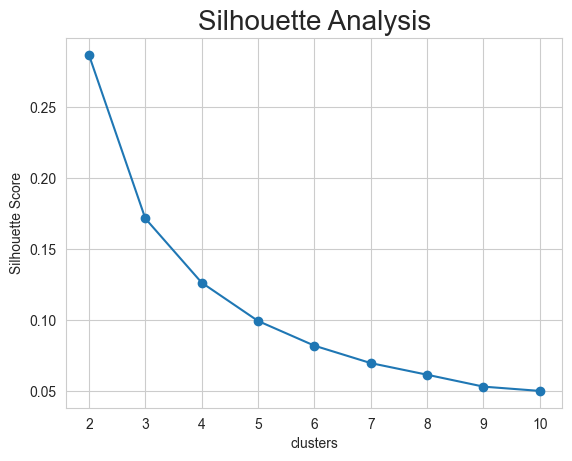

In [9]:
from sklearn.metrics import silhouette_score
wcss= []
silhouette=[]

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(df.drop('Sex',axis=1))
    wcss.append(km.inertia_)
    labels = km.fit_predict(df.drop('Sex',axis=1))
    if i>1:
      print('K:', i)
      score = silhouette_score(df.drop('Sex',axis=1), labels, metric='euclidean')/i
      silhouette.append(score)
      print('Silhouette Score:', score)

plt.plot(range(2,11), silhouette, marker='o')
plt.title('Silhouette Analysis', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('Silhouette Score')

# Elbow Method

Text(0, 0.5, 'wcss')

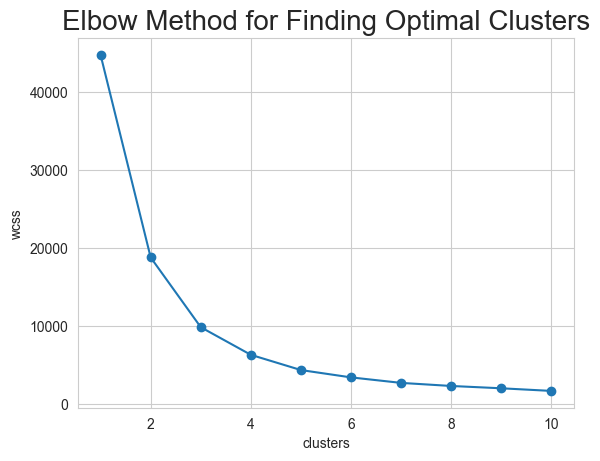

In [10]:
plt.plot(range(1,11),wcss, marker='o')
plt.title('Elbow Method for Finding Optimal Clusters', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('wcss')

K = 2, WCSS*K Score: 18789.318178714548
K = 3, WCSS*K Score: 9847.825409334222
K = 4, WCSS*K Score: 6306.193510630775
K = 5, WCSS*K Score: 4353.800707996737
K = 6, WCSS*K Score: 3414.5164074020354
K = 7, WCSS*K Score: 2709.1450101960972
K = 8, WCSS*K Score: 2314.488377390569
K = 9, WCSS*K Score: 2017.5178010579434
K = 10, WCSS*K Score: 1680.4679725647668


Text(0, 0.5, 'WCSS*K')

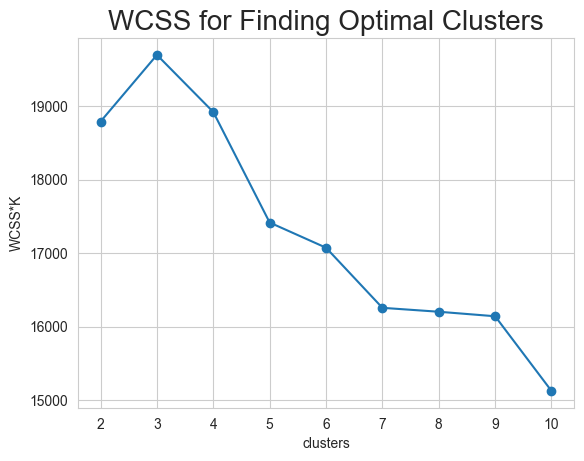

In [11]:
# WCSS/K
wcss_K =[]
for i in range(1,10):
  wcss_K.append(wcss[i]*i+1)
  print(f"K = {i+1}, WCSS*K Score: {wcss[i]}")

plt.plot(range(2,11),wcss_K, marker='o')
plt.title('WCSS for Finding Optimal Clusters', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('WCSS*K')

# Re-Preprocessing

In [12]:
# merge male dan female menjadi "adult"
df['Sex'].replace(2, 0, inplace = True)
df

C:\Users\richa\AppData\Local\Temp\ipykernel_13080\3637610587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'].replace(2, 0, inplace = True)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Redo K-Means

In [13]:
kmeans = KMeans(n_clusters=2,verbose=0,tol=1e-3,max_iter=300,n_init=20)
kmeans.fit(df.drop('Sex',axis=1))


df1=df.copy()
print(classification_report(df1['Sex'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.90      0.31      0.46      2833
           1       0.39      0.93      0.55      1339

    accuracy                           0.51      4172
   macro avg       0.65      0.62      0.50      4172
weighted avg       0.74      0.51      0.49      4172



              precision    recall  f1-score   support

           0       0.90      0.31      0.46      2833
           1       0.39      0.93      0.55      1339

    accuracy                           0.51      4172
   macro avg       0.65      0.62      0.50      4172
weighted avg       0.74      0.51      0.49      4172



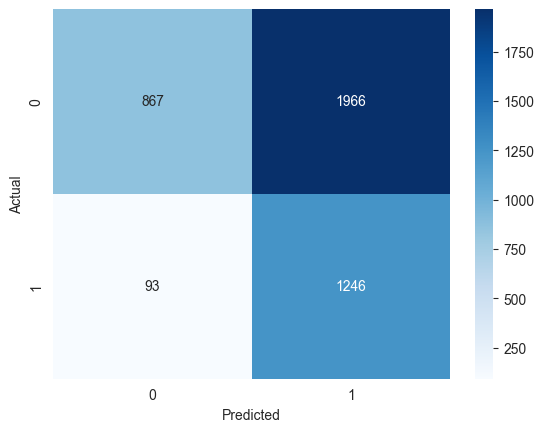

In [14]:
df1=df.copy()
print(classification_report(df1['Sex'], kmeans.labels_))
# confusion matrix
cm = confusion_matrix(df1['Sex'], kmeans.labels_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()